# Background

I am a junior data analyst working on the marketing analyst team at Bellabeat a high-tech manufacturer of health-focused products for women.

# Ask Phase

- Asked to focus on one of Bellabeat’s products and analyze smart device data to gain insight into how consumers are using their smart devices.
- Present insights based on analysis to help marketing stratergy for company.

Questions to look out for in analysis:
1. What are some trends in smart device usage?2. How could these trends apply to Bellabeat customers?
3. How could these trends help influence Bellabeat marketing strategy?

Stakeholders :
- Urška Sršen: Bellabeat’s cofounder and Chief Creative Officer
- Sando Mur: Mathematician and Bellabeat’s cofounder; key member of the Bellabeat executive team
- Bellabeat marketing analytics team

# Prepare Phase


- Data is stored in kaggle dataset. Link :- https://www.kaggle.com/datasets/arashnic/fitbit/data
- Data is orgaised in 2 directories datewise.One is from 3.12.16 - 4.11.16 and 4.12.16 - 5.12.16
- Data is ROOC as its given by company team directly. Still we will look into it in later stages.
- Data is open-sourced by data provider with keeping in mind all factors and taking neccesary steps.

In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse)
library(ggplot2)
library(lubridate)
library(dplyr)
library(readr)
library(tidyr)
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     


── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "fitbit"

In [2]:
# Lets use dataset from 4.12.16 - 5.12.16 for analysis

In [3]:
# Import the data
daily_activity <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
heartrate <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
hourly_calories <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
minute_calories_narrow <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minute_calories_wide <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minute_intensities_narrow <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minute_intensities_wide <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minute_MET_narrow <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minute_sleep <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")
minute_steps_narrow <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minute_steps_wide <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
sleep_day <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log <- read.csv("/kaggle/input/fitbit/mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


# Process Phase

In [4]:
# Narrowed down the number of tables to analyze according to observations and reviewing.
# Reviewing the selected tables using glimpse()

glimpse(daily_activity)
glimpse(heartrate)
glimpse(hourly_calories)
glimpse(hourly_intensities)
glimpse(hourly_steps)
glimpse(sleep_day)
glimpse(weight_log)

Rows: 940
Columns: 15
$ Id                       <dbl> 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityDate             <chr> "4/12/2016", "4/13/2016", "4/14/2016", "4/15/…
$ TotalSteps               <int> 13162, 10735, 10460, 9762, 12669, 9705, 13019…
$ TotalDistance            <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ TrackerDistance          <dbl> 8.50, 6.97, 6.74, 6.28, 8.16, 6.48, 8.59, 9.8…
$ LoggedActivitiesDistance <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveDistance       <dbl> 1.88, 1.57, 2.44, 2.14, 2.71, 3.19, 3.25, 3.5…
$ ModeratelyActiveDistance <dbl> 0.55, 0.69, 0.40, 1.26, 0.41, 0.78, 0.64, 1.3…
$ LightActiveDistance      <dbl> 6.06, 4.71, 3.91, 2.83, 5.04, 2.51, 4.71, 5.0…
$ SedentaryActiveDistance  <dbl> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, …
$ VeryActiveMinutes        <int> 25, 21, 30, 29, 36, 38, 42, 50, 28, 19, 66, 4…
$ FairlyActiveMinutes      <int> 13, 19, 11, 34, 10, 20, 16, 31, 12, 8, 27, 21…
$ LightlyActiveMin

Rows: 2,483,658
Columns: 3
$ Id    <dbl> 2022484408, 2022484408, 2022484408, 2022484408, 2022484408, 2022…
$ Time  <chr> "4/12/2016 7:21:00 AM", "4/12/2016 7:21:05 AM", "4/12/2016 7:21:…
$ Value <int> 97, 102, 105, 103, 101, 95, 91, 93, 94, 93, 92, 89, 83, 61, 60, …


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ Calories     <int> 81, 61, 59, 47, 48, 48, 48, 47, 68, 141, 99, 76, 73, 66, …


Rows: 22,099
Columns: 4
$ Id               <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 15039…
$ ActivityHour     <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/1…
$ TotalIntensity   <int> 20, 8, 7, 0, 0, 0, 0, 0, 13, 30, 29, 12, 11, 6, 36, 5…
$ AverageIntensity <dbl> 0.333333, 0.133333, 0.116667, 0.000000, 0.000000, 0.0…


Rows: 22,099
Columns: 3
$ Id           <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150396036…
$ ActivityHour <chr> "4/12/2016 12:00:00 AM", "4/12/2016 1:00:00 AM", "4/12/20…
$ StepTotal    <int> 373, 160, 151, 0, 0, 0, 0, 0, 250, 1864, 676, 360, 253, 2…


Rows: 413
Columns: 5
$ Id                 <dbl> 1503960366, 1503960366, 1503960366, 1503960366, 150…
$ SleepDay           <chr> "4/12/2016 12:00:00 AM", "4/13/2016 12:00:00 AM", "…
$ TotalSleepRecords  <int> 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, …
$ TotalMinutesAsleep <int> 327, 384, 412, 340, 700, 304, 360, 325, 361, 430, 2…
$ TotalTimeInBed     <int> 346, 407, 442, 367, 712, 320, 377, 364, 384, 449, 3…


Rows: 67
Columns: 8
$ Id             <dbl> 1503960366, 1503960366, 1927972279, 2873212765, 2873212…
$ Date           <chr> "5/2/2016 11:59:59 PM", "5/3/2016 11:59:59 PM", "4/13/2…
$ WeightKg       <dbl> 52.6, 52.6, 133.5, 56.7, 57.3, 72.4, 72.3, 69.7, 70.3, …
$ WeightPounds   <dbl> 115.9631, 115.9631, 294.3171, 125.0021, 126.3249, 159.6…
$ Fat            <int> 22, NA, NA, NA, NA, 25, NA, NA, NA, NA, NA, NA, NA, NA,…
$ BMI            <dbl> 22.65, 22.65, 47.54, 21.45, 21.69, 27.45, 27.38, 27.25,…
$ IsManualReport <chr> "True", "True", "False", "True", "True", "True", "True"…
$ LogId          <dbl> 1.462234e+12, 1.462320e+12, 1.460510e+12, 1.461283e+12,…


In [5]:
# checking for number of users 

n_distinct(daily_activity$Id)
n_distinct(heartrate$Id)
n_distinct(hourly_calories$Id)
n_distinct(hourly_intensities$Id)
n_distinct(hourly_steps$Id)
n_distinct(sleep_day$Id)
n_distinct(weight_log$Id)

[1] 33

[1] 14

[1] 33

[1] 33

[1] 33

[1] 24

[1] 8

We can see that there are 33 users data in daily_activity, hourly_calories, hourly_intensities, hourly_steps. While sleep_day have 24 user's data, heartrate have 14 user's data and weight_log has 8 user's data.

We can remove heartrate and weight_log table's data from analysis due to less user's data.

In [6]:
#Making new columns which stores a weekday of certain date.
daily_activity$Day <- as.Date(daily_activity$ActivityDate, format ="%m/%d/%Y")
daily_activity$Day <- weekdays(daily_activity$Day)

sleep_day$Day <- as.Date(sleep_day$SleepDay, format ="%m/%d/%Y")
sleep_day$Day <- weekdays(sleep_day$Day)


In [7]:
#Changing datatype of ID column's from Numeric type to Character type.
daily_activity$Id <- as.character(daily_activity$Id)

hourly_calories$Id <- as.character(hourly_calories$Id)

hourly_intensities$Id <- as.character(hourly_intensities$Id)

hourly_steps$Id <- as.character(hourly_steps$Id)

sleep_day$Id <- as.character(sleep_day$Id)

In [8]:
# converting format of column from character to date / datetime as required

daily_activity$ActivityDate <- mdy(daily_activity$ActivityDate)

hourly_calories$ActivityHour <- mdy_hms(hourly_calories$ActivityHour)

hourly_intensities$ActivityHour <- mdy_hms(hourly_intensities$ActivityHour)

hourly_steps$ActivityHour <- mdy_hms(hourly_steps$ActivityHour)

sleep_day$SleepDay <- mdy_hms(sleep_day$SleepDay)

In [9]:
# Making separate columns for date and time where both are in same column to make analysis more easier.

hourly_calories$ActivityDate <- date(hourly_calories$ActivityHour)
hourly_calories$ActivityHour <- hour(hourly_calories$ActivityHour)

hourly_intensities$ActivityDate <- date(hourly_intensities$ActivityHour)
hourly_intensities$ActivityHour <- hour(hourly_intensities$ActivityHour)

hourly_steps$ActivityDate <- date(hourly_steps$ActivityHour)
hourly_steps$ActivityHour <- hour(hourly_steps$ActivityHour)

With this we are done with perpare phase

# Analyze Phase

In [10]:
# summary of all selected tables and columns in them for brief analysis.
daily_activity |>
summary()

      Id             ActivityDate          TotalSteps    TotalDistance   
 Length:940         Min.   :2016-04-12   Min.   :    0   Min.   : 0.000  
 Class :character   1st Qu.:2016-04-19   1st Qu.: 3790   1st Qu.: 2.620  
 Mode  :character   Median :2016-04-26   Median : 7406   Median : 5.245  
                    Mean   :2016-04-26   Mean   : 7638   Mean   : 5.490  
                    3rd Qu.:2016-05-04   3rd Qu.:10727   3rd Qu.: 7.713  
                    Max.   :2016-05-12   Max.   :36019   Max.   :28.030  
 TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.000   Min.   :0.0000           Min.   : 0.000    
 1st Qu.: 2.620   1st Qu.:0.0000           1st Qu.: 0.000    
 Median : 5.245   Median :0.0000           Median : 0.210    
 Mean   : 5.475   Mean   :0.1082           Mean   : 1.503    
 3rd Qu.: 7.710   3rd Qu.:0.0000           3rd Qu.: 2.053    
 Max.   :28.030   Max.   :4.9421           Max.   :21.920    
 ModeratelyActiveDistance LightActiveDistance Se

In [11]:
hourly_calories |>
summary() |>
head()

      Id             ActivityHour      Calories       ActivityDate       
 Length:22099       Min.   : 0.00   Min.   : 42.00   Min.   :2016-04-12  
 Class :character   1st Qu.: 5.00   1st Qu.: 63.00   1st Qu.:2016-04-19  
 Mode  :character   Median :11.00   Median : 83.00   Median :2016-04-26  
                    Mean   :11.42   Mean   : 97.39   Mean   :2016-04-26  
                    3rd Qu.:17.00   3rd Qu.:108.00   3rd Qu.:2016-05-03  
                    Max.   :23.00   Max.   :948.00   Max.   :2016-05-12  

In [12]:
hourly_intensities |>
summary()

      Id             ActivityHour   TotalIntensity   AverageIntensity
 Length:22099       Min.   : 0.00   Min.   :  0.00   Min.   :0.0000  
 Class :character   1st Qu.: 5.00   1st Qu.:  0.00   1st Qu.:0.0000  
 Mode  :character   Median :11.00   Median :  3.00   Median :0.0500  
                    Mean   :11.42   Mean   : 12.04   Mean   :0.2006  
                    3rd Qu.:17.00   3rd Qu.: 16.00   3rd Qu.:0.2667  
                    Max.   :23.00   Max.   :180.00   Max.   :3.0000  
  ActivityDate       
 Min.   :2016-04-12  
 1st Qu.:2016-04-19  
 Median :2016-04-26  
 Mean   :2016-04-26  
 3rd Qu.:2016-05-03  
 Max.   :2016-05-12  

In [13]:
hourly_steps|>
summary()

      Id             ActivityHour     StepTotal        ActivityDate       
 Length:22099       Min.   : 0.00   Min.   :    0.0   Min.   :2016-04-12  
 Class :character   1st Qu.: 5.00   1st Qu.:    0.0   1st Qu.:2016-04-19  
 Mode  :character   Median :11.00   Median :   40.0   Median :2016-04-26  
                    Mean   :11.42   Mean   :  320.2   Mean   :2016-04-26  
                    3rd Qu.:17.00   3rd Qu.:  357.0   3rd Qu.:2016-05-03  
                    Max.   :23.00   Max.   :10554.0   Max.   :2016-05-12  

In [14]:
# Creating new column which stores difference of sleep time aand time in bed.
sleep_day$Mins <- sleep_day$TotalTimeInBed - sleep_day$TotalMinutesAsleep

sleep_day |>
summary()


      Id               SleepDay                      TotalSleepRecords
 Length:413         Min.   :2016-04-12 00:00:00.00   Min.   :1.000    
 Class :character   1st Qu.:2016-04-19 00:00:00.00   1st Qu.:1.000    
 Mode  :character   Median :2016-04-27 00:00:00.00   Median :1.000    
                    Mean   :2016-04-26 12:40:05.80   Mean   :1.119    
                    3rd Qu.:2016-05-04 00:00:00.00   3rd Qu.:1.000    
                    Max.   :2016-05-12 00:00:00.00   Max.   :3.000    
 TotalMinutesAsleep TotalTimeInBed      Day                 Mins       
 Min.   : 58.0      Min.   : 61.0   Length:413         Min.   :  0.00  
 1st Qu.:361.0      1st Qu.:403.0   Class :character   1st Qu.: 17.00  
 Median :433.0      Median :463.0   Mode  :character   Median : 25.00  
 Mean   :419.5      Mean   :458.6                      Mean   : 39.17  
 3rd Qu.:490.0      3rd Qu.:526.0                      3rd Qu.: 40.00  
 Max.   :796.0      Max.   :961.0                      Max.   :371.00  

With these we are done with analyze phase as the data was cleaned and organised preety well from beginning. We just needed to find the Mean, Max and Min which we did using summary() function.

# Share Phase

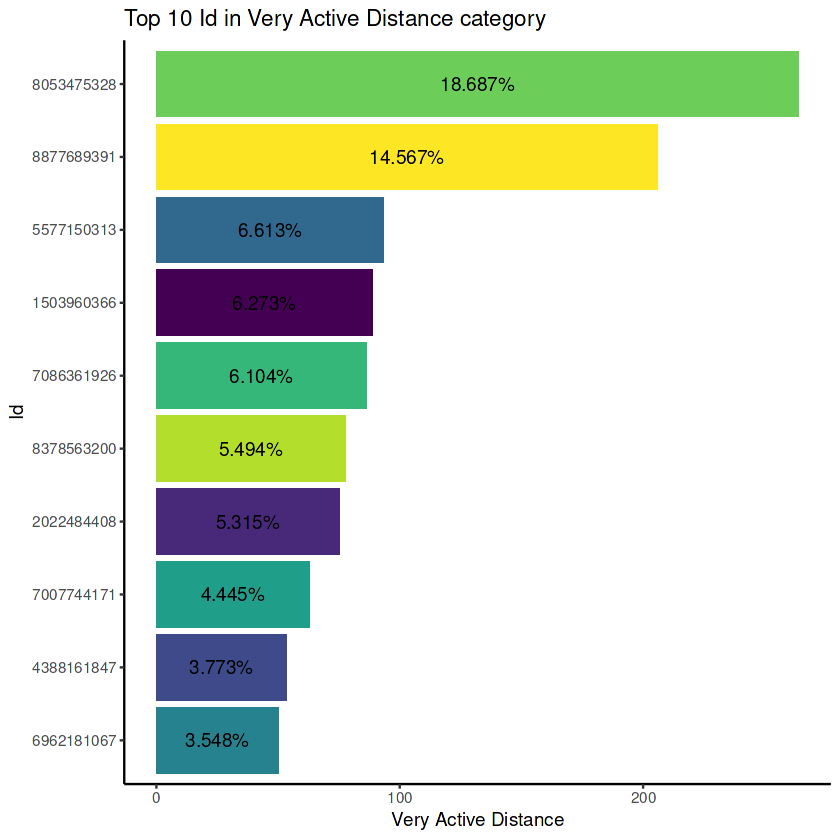

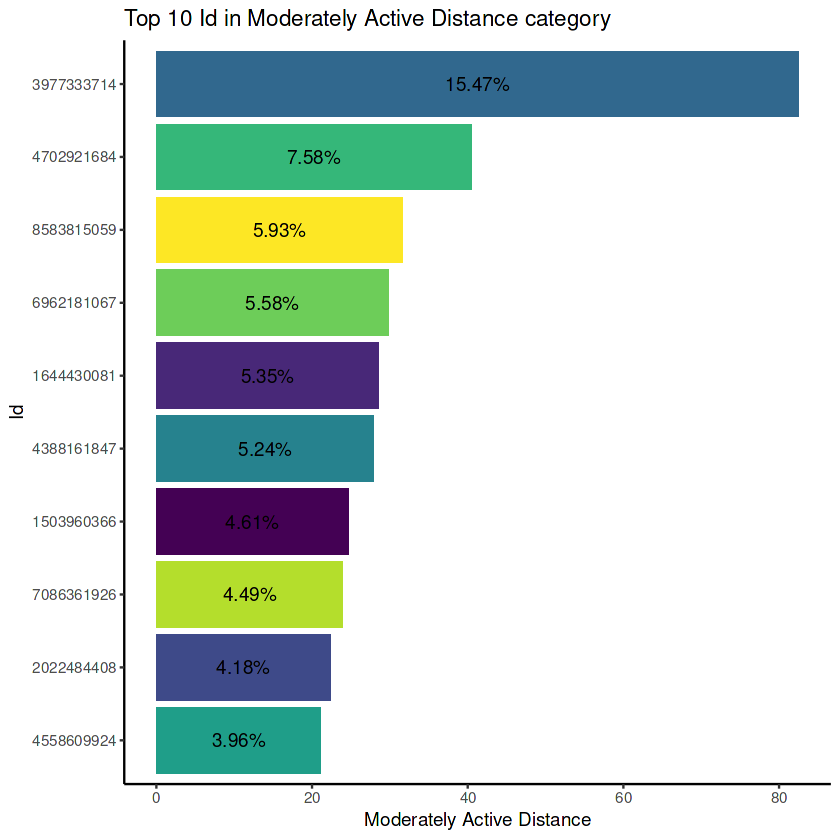

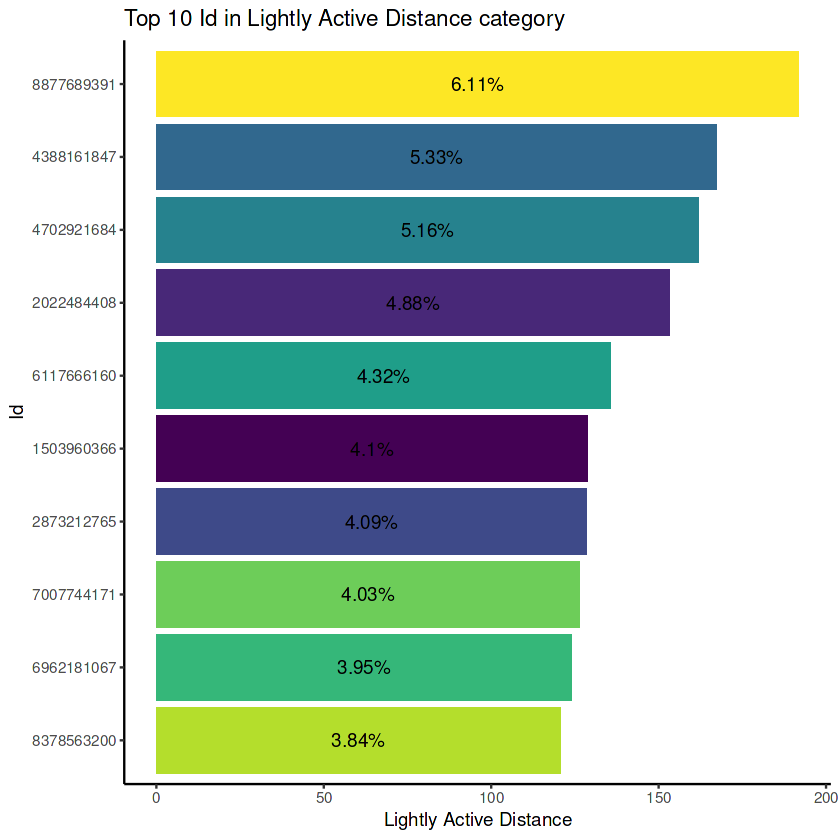

In [15]:

id_V <- daily_activity |>
group_by(Id) |>
summarize(VeryActiveDistance = sum(VeryActiveDistance)) 

id_V$percent = round((id_V$VeryActiveDistance / sum(id_V$VeryActiveDistance) )* 100, 3)

id_V <- id_V |>
 arrange(desc(percent)) |>
head(10)

id_M <- daily_activity |>
group_by(Id) |>
summarize(ModeratelyActiveDistance = sum(ModeratelyActiveDistance))

id_M$percent = round((id_M$ModeratelyActiveDistance / sum(id_M$ModeratelyActiveDistance) )* 100, 2)

id_M <- id_M |>
 arrange(desc(percent)) |>
head(10)

id_L <- daily_activity |>
group_by(Id) |>
summarize(LightActiveDistance = sum(LightActiveDistance))

id_L$percent = round((id_L$LightActiveDistance / sum(id_L$LightActiveDistance) )* 100, 2)

id_L <- id_L |>
 arrange(desc(percent)) |>
head(10)


ggplot(id_V, aes( x = VeryActiveDistance, y = reorder(Id, VeryActiveDistance), fill = Id)) +
geom_col(show.legend = FALSE) +
scale_fill_viridis_d() +
geom_text(aes(label = paste0(percent, "%")),
         position = position_stack(vjust = 0.5)) +
theme_classic() +
labs(
    x = "Very Active Distance",
    y = "Id",
    title = "Top 10 Id in Very Active Distance category"
)

ggplot(id_M, aes( x = ModeratelyActiveDistance, y = reorder(Id, ModeratelyActiveDistance ), fill = Id)) +
geom_col(show.legend = FALSE) +
scale_fill_viridis_d() +
geom_text(aes(label = paste0(percent, "%")),
         position = position_stack(vjust = 0.5)) +
theme_classic() +
labs(
    x = "Moderately Active Distance",
    y = "Id",
    title = "Top 10 Id in Moderately Active Distance category"
)

ggplot(id_L, aes( x = LightActiveDistance, y = reorder(Id, LightActiveDistance ), fill = Id)) +
geom_col(show.legend = FALSE) +
scale_fill_viridis_d() +
geom_text(aes(label = paste0(percent, "%")),
         position = position_stack(vjust = 0.5)) +
theme_classic() +
labs(
    x = "Lightly Active Distance",
    y = "Id",
    title = "Top 10 Id in Lightly Active Distance category"
)


In [16]:
minute <- daily_activity |>
summarize(VeryActiveMinutes = sum(VeryActiveMinutes),
          FairlyActiveMinutes = sum(FairlyActiveMinutes),
          LightlyActiveMinutes = sum(LightlyActiveMinutes),
          SedentaryMinutes = sum(SedentaryMinutes)
         )

minute <- minute |>
pivot_longer(
    cols = everything(), # Select all columns
    names_to = "MinutesType", # New column for variable names
    values_to = "Minutes"     # New column for values
)

minute$percent <- as.character(round(minute$Minutes/sum(minute$Minutes) * 100, 2))
minute$MinutesType <- factor(minute$MinutesType, levels = unique(minute$MinutesType))

minute

MinutesType,Minutes,percent
<fct>,<int>,<chr>
VeryActiveMinutes,19895,1.74
FairlyActiveMinutes,12751,1.11
LightlyActiveMinutes,181244,15.82
SedentaryMinutes,931738,81.33


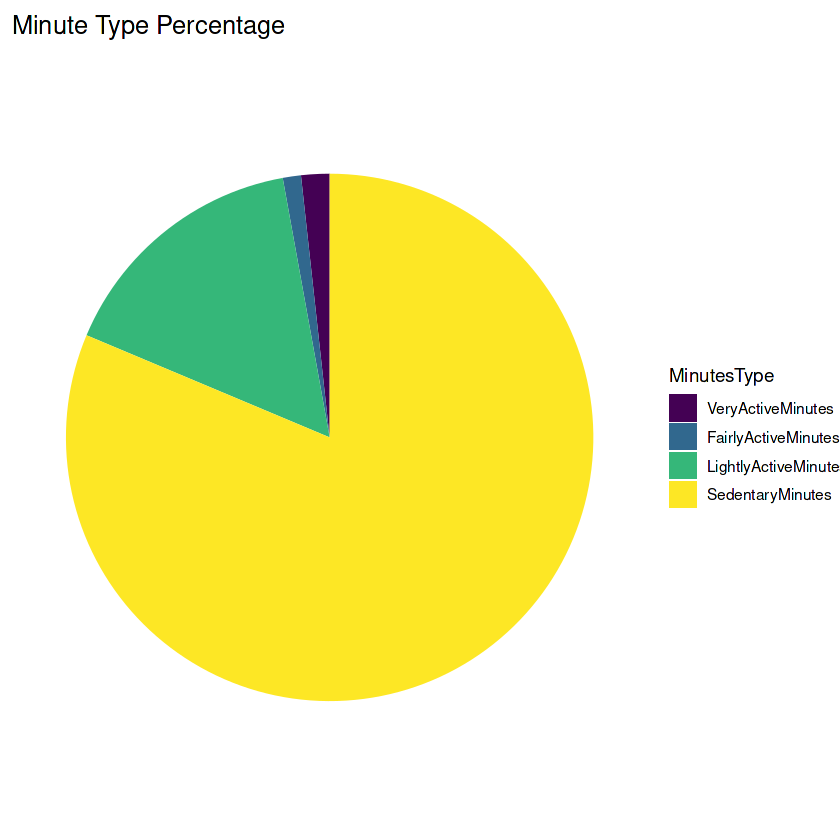

In [17]:
minute_pie <- ggplot(minute, aes(x = "", y = Minutes, fill = MinutesType)) +
  geom_bar(stat = "identity", width = 1) +
  coord_polar("y") +
  theme_void() +
  scale_fill_manual(
    values = c(
      "VeryActiveMinutes" = "#440154", # Viridis-like colors
      "FairlyActiveMinutes" = "#31688e",
      "LightlyActiveMinutes" = "#35b779",
      "SedentaryMinutes" = "#fde725"
    )
  ) +
labs(title = "Minute Type Percentage") +
  theme(legend.position = "right", plot.title = element_text(vjust = 11, hjust = 0.03, size = 15),  legend.text = element_text(size = 9)) 
 
minute_pie


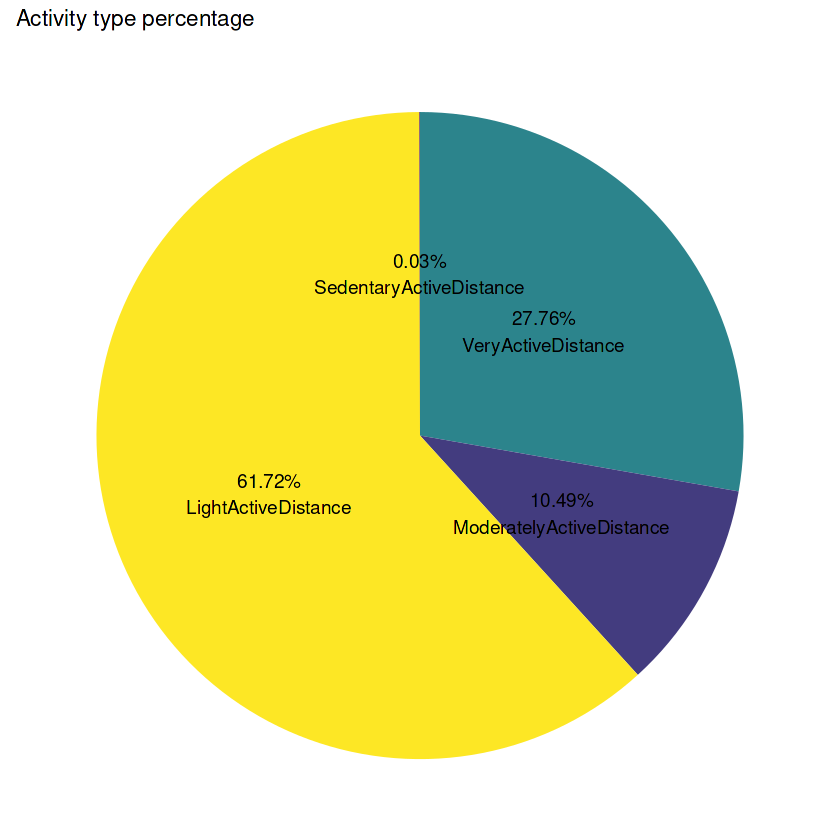

In [18]:
distance <- daily_activity |>
summarize(VeryActiveDistance = sum(VeryActiveDistance),
          ModeratelyActiveDistance = sum(ModeratelyActiveDistance),
          LightActiveDistance = sum(LightActiveDistance),
          SedentaryActiveDistance = sum(SedentaryActiveDistance)
         )

distance <- distance |>
pivot_longer(
    cols = everything(), # Select all columns
    names_to = "ActivityType", # New column for variable names
    values_to = "Distance"     # New column for values
)

distance$percent <- round(distance$Distance/sum(distance$Distance) * 100, 2)


distance_pie <- ggplot(distance,
       aes(x = "", y = Distance, fill = percent)) +
    geom_bar(stat = "identity", 
             show.legend = FALSE, width = 1) +
    coord_polar("y") +
    theme_void() +
    geom_text(
        aes(label = paste0(percent, "%", "\n", ActivityType)),
              position = position_stack(vjust = 0.5)) +
    labs(title = "Activity type percentage") +
scale_fill_viridis_c()
distance_pie 

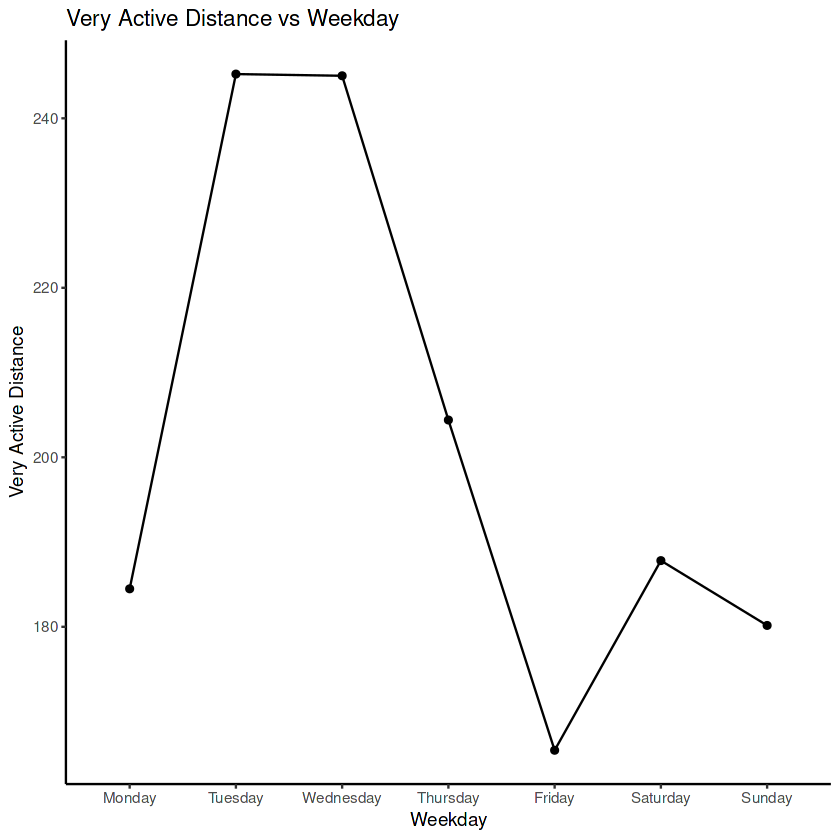

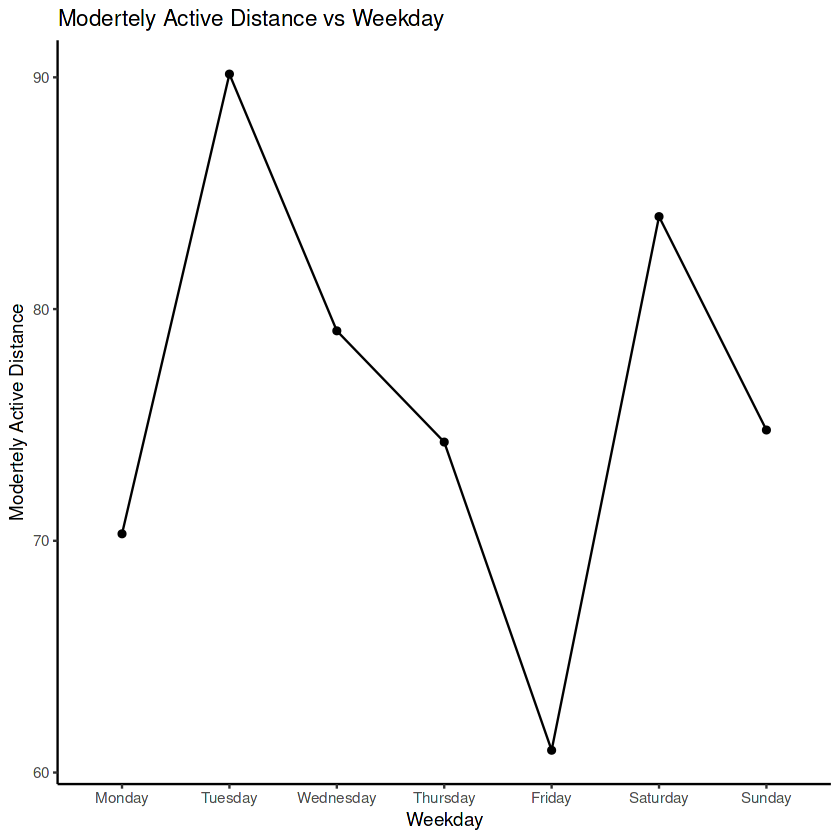

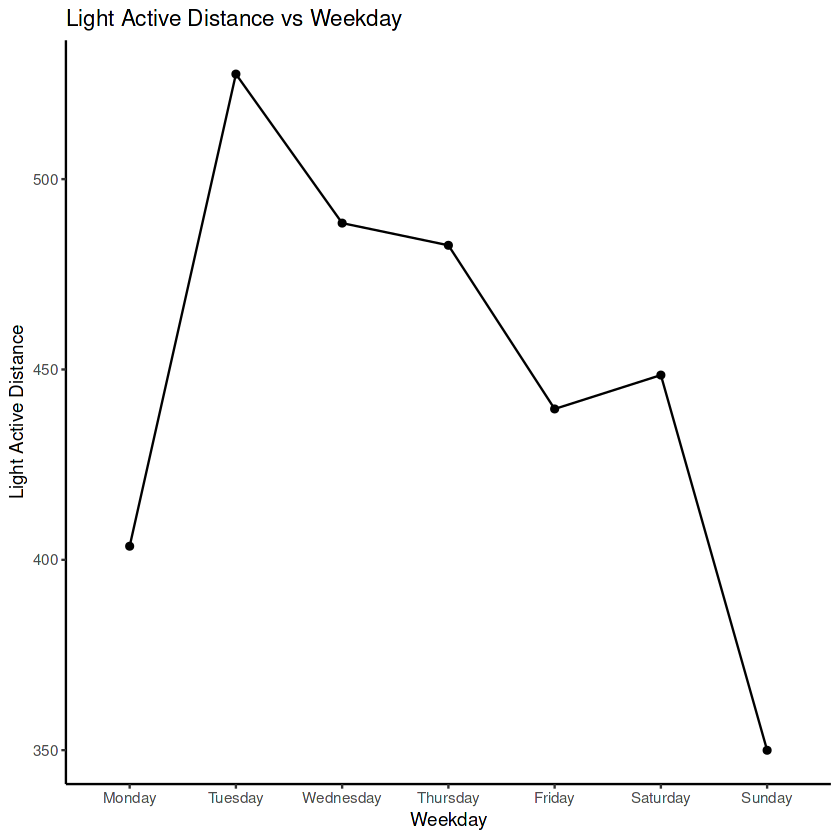

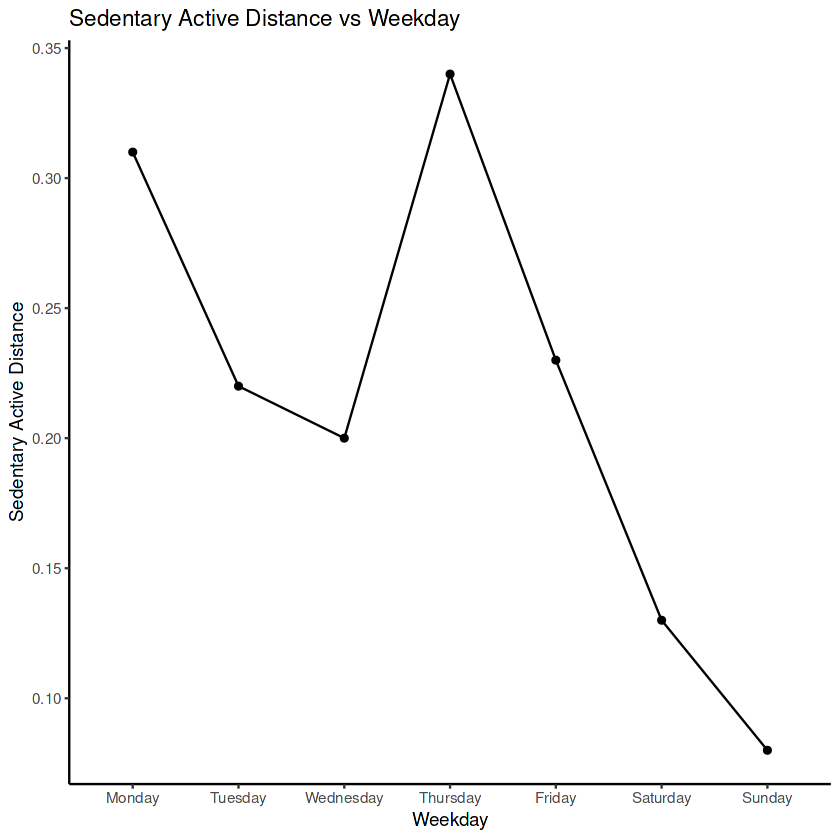

In [19]:
day <- daily_activity |>
group_by(Day) |>
summarize(VeryActiveDistance = sum(VeryActiveDistance), ModeratelyActiveDistance = sum(ModeratelyActiveDistance), LightActiveDistance = sum(LightActiveDistance), SedentaryActiveDistance = sum(SedentaryActiveDistance) )

day <- day  %>%
  mutate(
      Day = factor(
          Day, 
          levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
      )
  )


ggplot(day, aes(x = Day)) +
geom_point(aes( y = VeryActiveDistance), group = 1) +
geom_line(aes( y = VeryActiveDistance), group = 1) +
theme_classic() +
labs(
    x = "Weekday",
    y = "Very Active Distance",
    title = "Very Active Distance vs Weekday"
)

ggplot(day, aes(x = Day)) +
geom_point(aes( y = ModeratelyActiveDistance), group = 1) +
geom_line(aes( y = ModeratelyActiveDistance), group = 1) +
theme_classic() +
labs(
    x = "Weekday",
    y = "Modertely Active Distance",
    title = "Modertely Active Distance vs Weekday"
)

ggplot(day, aes(x = Day)) +
geom_point(aes( y = LightActiveDistance), group = 1) +
geom_line(aes( y = LightActiveDistance), group = 1) +
theme_classic() +
labs(
    x = "Weekday",
    y = "Light Active Distance",
    title = "Light Active Distance vs Weekday"
)

ggplot(day, aes(x = Day)) +
geom_point(aes( y = SedentaryActiveDistance), group = 1) +
geom_line(aes( y = SedentaryActiveDistance), group = 1) +
theme_classic() +
labs(
    x = "Weekday",
    y = "Sedentary Active Distance",
    title = "Sedentary Active Distance vs Weekday"
)

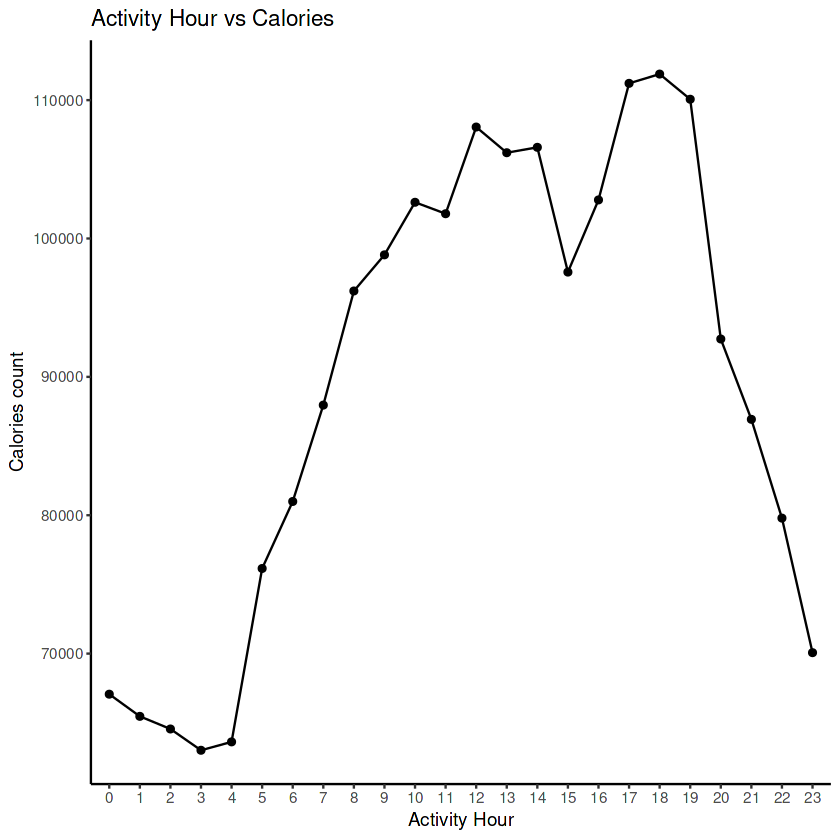

In [20]:
hourly_calories_hour <- hourly_calories |>
select(ActivityHour, Calories) |>
group_by(ActivityHour) |>
summarize(sum = sum(Calories))

ggplot(hourly_calories_hour, aes(x = as.factor(ActivityHour), y = sum)) +
geom_point() +
geom_line(group = 1) +
labs(
    x = "Activity Hour",
    y = "Calories count",
    title = "Activity Hour vs Calories"
) +
theme_classic()

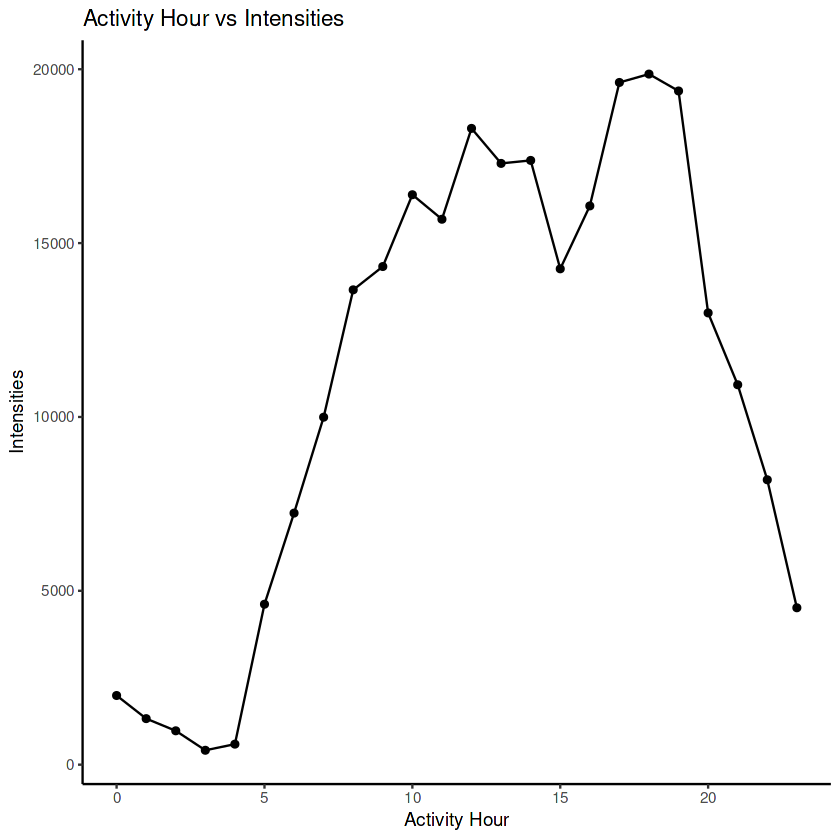

In [21]:
hourly_intensity_hour <- hourly_intensities |>
select(ActivityHour, TotalIntensity) |>
group_by(ActivityHour) |>
summarize(sum = sum(TotalIntensity))

ggplot(hourly_intensity_hour, aes(x = ActivityHour, y = sum)) +
geom_point() +
geom_line() +
labs(
    x = "Activity Hour",
    y = "Intensities",
    title = "Activity Hour vs Intensities"
) +
theme_classic()

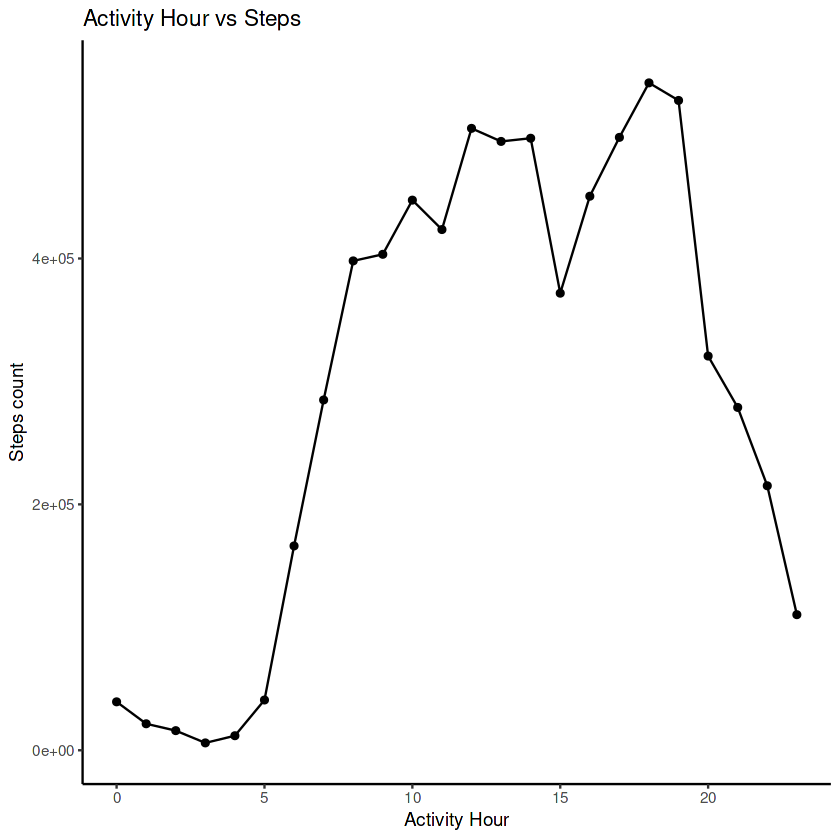

In [22]:
hourly_steps_hour <- hourly_steps |>
select(ActivityHour, StepTotal) |>
group_by(ActivityHour) |>
summarize(sum = sum(StepTotal)) 

ggplot(hourly_steps_hour, aes(x = ActivityHour, y = sum)) +
scale_y_continuous(limits = c(0, 550000)) +
geom_point() +
geom_line() +
labs(
    x = "Activity Hour",
    y = "Steps count",
    title = "Activity Hour vs Steps"
) +
theme_classic()

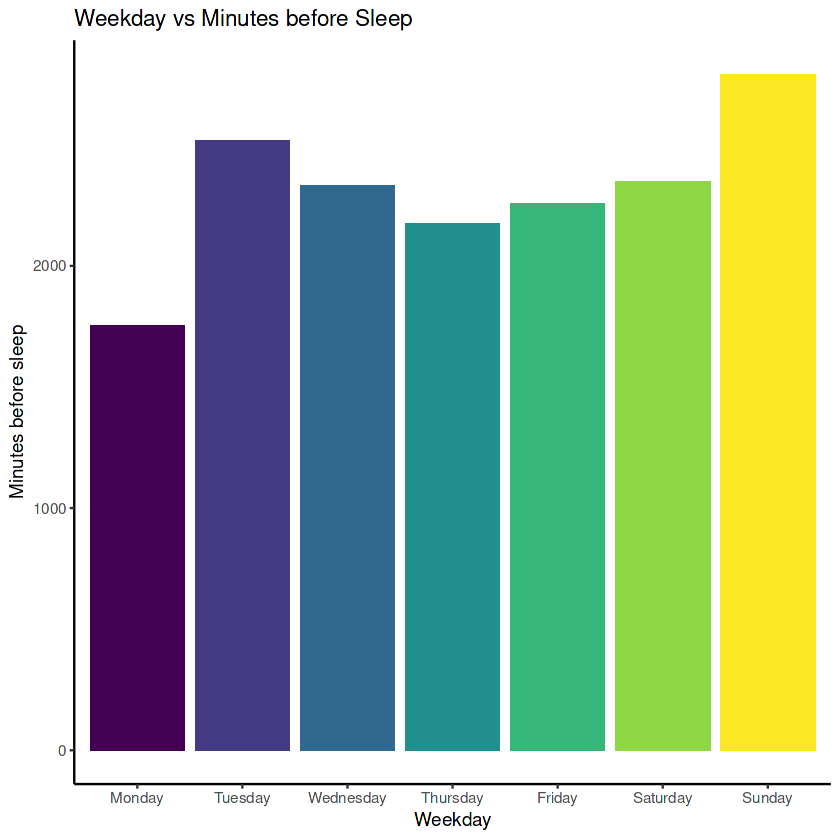

In [23]:
sleep_day$Day <- factor(
  sleep_day$Day,
  levels = c("Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday")
)

ggplot(sleep_day, aes(x = Day, y = Mins, fill = Day)) +
geom_col(show.legend = FALSE) +
theme_classic() +
scale_fill_viridis_d() +
labs(
    x = "Weekday",
    y = "Minutes before sleep",
    title = "Weekday vs Minutes before Sleep"
)

# Act Phase

Recommedations based on Analysis:

- Focus on Light Active Distance activity type as people fall in that category 61.72% while making changes and features in devices.
  
- Badge or some reward system for those excelling in distance categories and introducing leaderboard system to motivate the users to push their limits and become healthier.
  
- We can see that users on average uses mobile or some devices for 39 minutes in bed before going to bed based on difference of time in bed and time as sleep. We should develop feature like autonight mode in devices of users as they go to bed to help them go to sleep as autonight mode changes color of screen which helps in keeping devices away.

- Showing ads to users based on their active time to make it more target based.